In [1]:
import pandas as pd
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
features = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted',
'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds',
'is_host_login',
'is_guest_login',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate',
'label']
print(len(features))

42


In [3]:
url = 'http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data.gz'

In [4]:
data = pd.read_csv(url, names=features, header=None)
data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.
5,0,tcp,http,SF,238,1282,0,0,0,0,...,5,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,normal.
6,0,tcp,http,SF,235,1337,0,0,0,0,...,6,1.0,0.0,0.17,0.0,0.0,0.0,0.0,0.0,normal.
7,0,tcp,http,SF,234,1364,0,0,0,0,...,7,1.0,0.0,0.14,0.0,0.0,0.0,0.0,0.0,normal.
8,0,tcp,http,SF,239,1295,0,0,0,0,...,8,1.0,0.0,0.12,0.0,0.0,0.0,0.0,0.0,normal.
9,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.


In [5]:
print('The no of data points are:',data.shape[0])
print('The no of features are:',data.shape[1])
print('Some of the features are:',features[:10])

The no of data points are: 4898431
The no of features are: 42
Some of the features are: ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot']


In [6]:
output = data['label'].values
labels = set(output)

In [41]:
print('The different type of output labels are:',labels)

The different type of output labels are: {'back.', 'nmap.', 'ipsweep.', 'multihop.', 'spy.', 'rootkit.', 'pod.', 'warezmaster.', 'normal.', 'perl.', 'portsweep.', 'loadmodule.', 'neptune.', 'ftp_write.', 'warezclient.', 'satan.', 'land.', 'imap.', 'teardrop.', 'phf.', 'guess_passwd.', 'buffer_overflow.', 'smurf.'}


In [40]:
num_unique_labels = data['label'].nunique()
print("Number of unique values in the 'label' column:", num_unique_labels)

Number of unique values in the 'label' column: 5


In [43]:
label_counts = data['label'].value_counts()

In [44]:
print("Label counts:")
print(label_counts)

Label counts:
label
normal.    812814
dos        247267
probe       13860
r2l           999
u2r            52
Name: count, dtype: int64


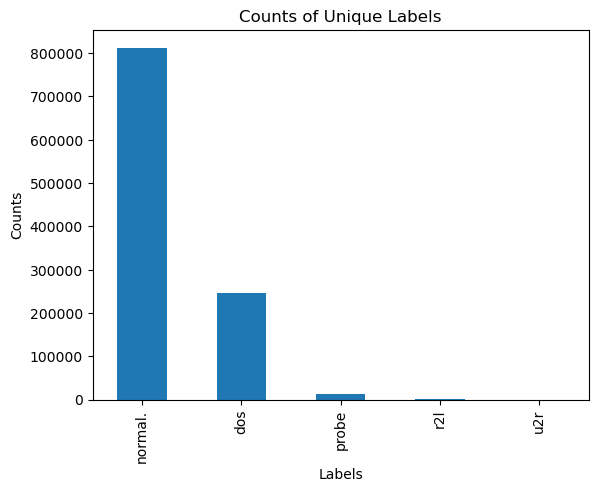

In [45]:
import matplotlib.pyplot as plt

label_counts.plot(kind='bar')

plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Counts of Unique Labels')

plt.show()

In [8]:
data.drop_duplicates(subset=features, keep='first', inplace=True)
data.shape

(1074992, 42)

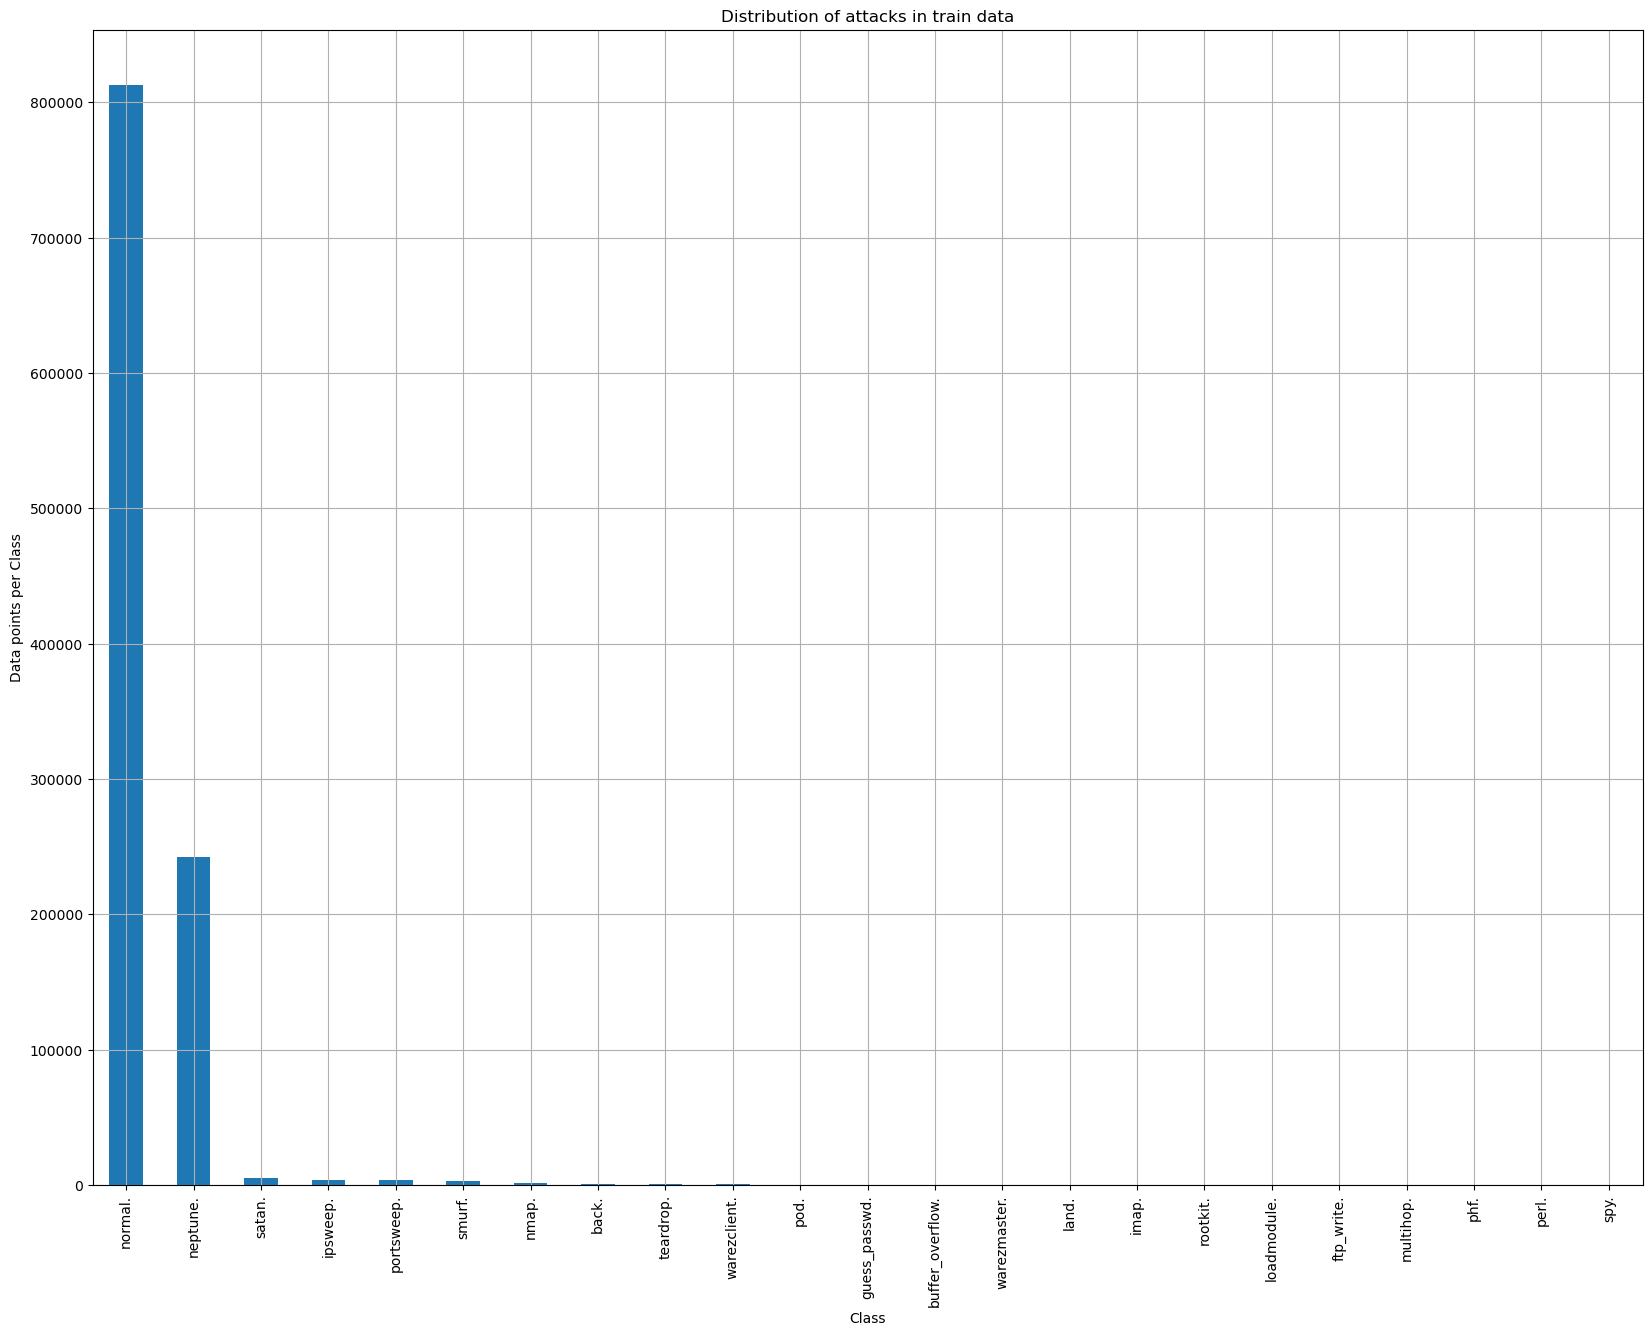

In [9]:
plt.figure(figsize=(20,15))
class_distribution = data['label'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of attacks in train data')
plt.grid()
plt.show()

In [10]:
data['num_outbound_cmds'].value_counts()
data.drop('num_outbound_cmds', axis=1, inplace=True)
data['is_host_login'].value_counts()
data.drop('is_host_login', axis=1, inplace=True)

In [11]:

data['protocol_type'] = data['protocol_type'].astype('category')
data['service'] = data['service'].astype('category')
data['flag'] = data['flag'].astype('category')
cat_columns = data.select_dtypes(['category']).columns
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)

In [12]:
X = data.drop('label', axis=1)
Y = data['label']

In [13]:
data.replace(to_replace = ['ipsweep.', 'portsweep.', 'nmap.', 'satan.'], value = 'probe', inplace = True)
data.replace(to_replace = ['ftp_write.', 'guess_passwd.', 'imap.', 'multihop.', 'phf.', 'spy.', 'warezclient.', 'warezmaster.'], value = 'r2l', inplace = True)
data.replace(to_replace = ['buffer_overflow.', 'loadmodule.', 'perl.', 'rootkit.'], value = 'u2r', inplace = True)
data.replace(to_replace = ['back.', 'land.' , 'neptune.', 'pod.', 'smurf.', 'teardrop.'], value = 'dos', inplace = True)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
model = RandomForestClassifier(n_estimators=500, random_state=42)

In [18]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [19]:
y_pred = model.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9998279061763078
Precision: 0.9998055734896398
Recall: 0.9998279061763078
F1 Score: 0.9998099249006105


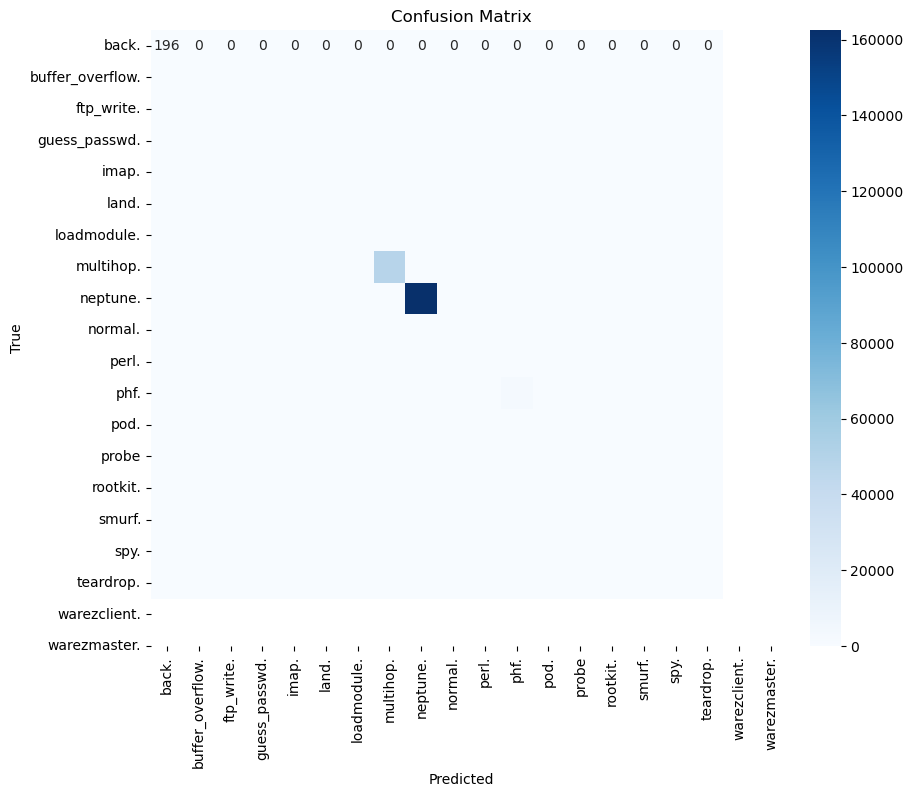

In [23]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred,average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1 Score:",f1)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [24]:
import joblib
joblib.dump(model, 'random_forest_modell.sav')

['random_forest_modell.sav']

In [25]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

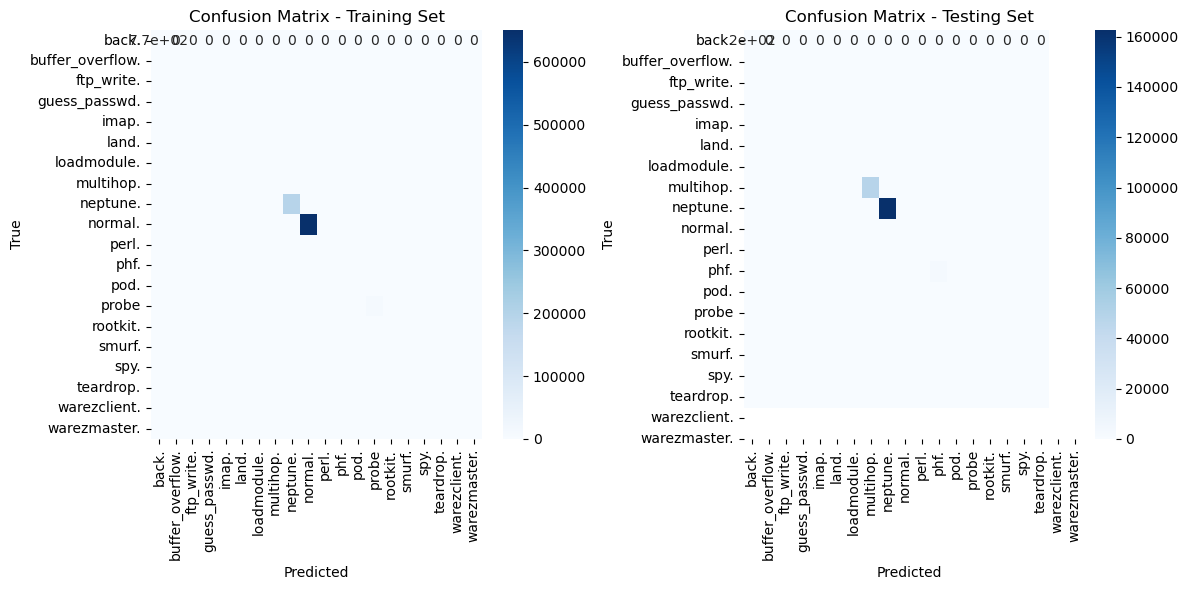

In [27]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Training Set')

plt.subplot(1, 2, 2)
sns.heatmap(cm_test, annot=True, cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Testing Set')

plt.tight_layout()
plt.show()

In [47]:
cm_train


array([[   772,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0],
       [     0,     19,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0],
       [     0,      0,      7,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0],
       [     0,      0,      0,     49,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0],
       [     0,      0,      0,      0,      9,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0],
       [     0,      0,      0,      0,      0,     11,      0,      0,
   

In [48]:
cm_test

array([[   196,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0,      6,      0,      0,      0,      0,      0,      0,
             5,      0,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0,      0,      0,      0,      0,      0,      0,      0,
             1,      0,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0,      0,      0,      3,      0,      0,      0,      0,
             1,      0,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0,      0,      0,      0,      1,      0,      0,      0,
             2,      0,      0,      0,      0,      0,      0,      0,
             0,      0],
       [     0,      0,      0,      0,      0,      3,      0,      0,
             4,      0,      0,      0,      0,      0,      0,      0,
           